Training Set
Number of Structures: 3025
RMSD <1: {'_br0': 32, '_br1': 23, '_br2': 21, 'be20': 1, 'be21': 3, 'be10': 2, 'be11': 1, 'be12': 2, 'be41': 1, 'be30': 2, 'be31': 1, 'be32': 1, 'be42': 1}
RMSD = 0: 10


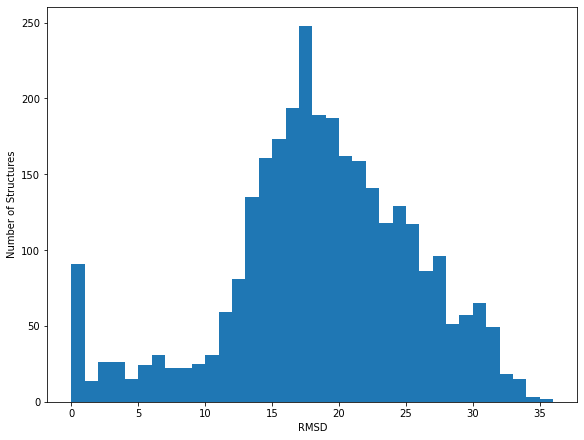

Truncated Training Set
Number of Structures: 945
RMSD <1: {'_br0': 14, '_br2': 9, '_br1': 12, 'be20': 1, 'be21': 1, 'be31': 2, 'be30': 1}
RMSD = 0: 10


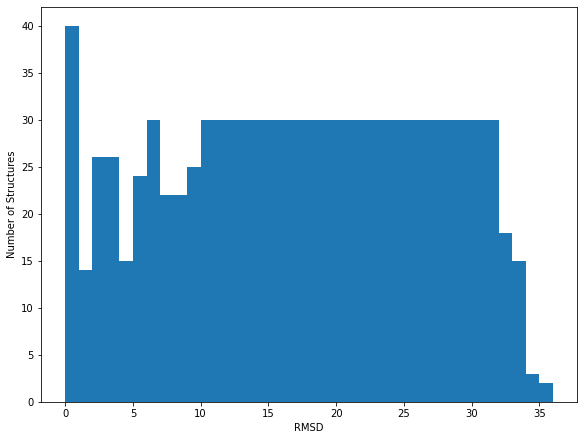

Validation Set
Number of Structures: 396
RMSD <1: {'_br0': 18, 'pdb': 36}
RMSD = 0: 48


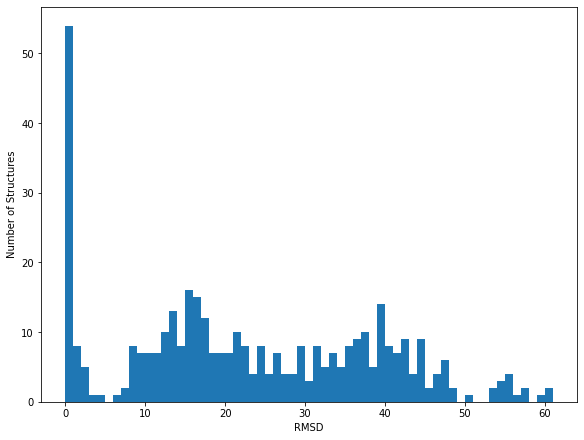

Test Set
Number of Structures: 277
RMSD <1: {'pdb': 42, '_br0': 18, '_be0': 4}
RMSD = 0: 53


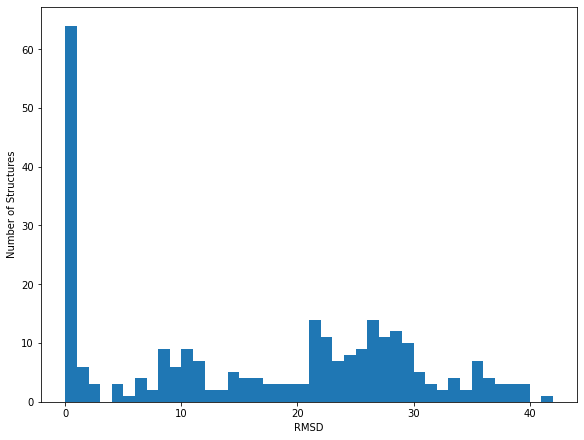

5S rRNAs and tRNAs with replica exchange
Number of Structures: 1083
RMSD <1: {'pdb': 100, '_br0': 62, '_be0': 6}
RMSD = 0: 113


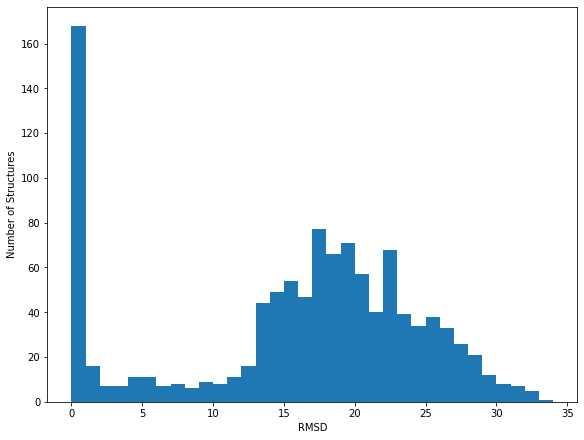

In [3]:
import matplotlib.pyplot as plt

for i, list in enumerate(["../data/train_rmsd_list.txt", "../data/truncated_train_rmsd.txt", "../data/val_rmsd_list.txt", "../data/test_rmsd_list.txt", "../data/old_train_rmsd_list.txt"]):
    with open(list) as fh:
        rmsd_list = []
        count_dict = {}
        rmsd_zero = 0
        for line in fh.readlines():
            name, rmsd = (line.rstrip()).split("\t")
            rmsd = float(rmsd)
            rmsd_list.append(rmsd)

            if rmsd == 0:
                rmsd_zero += 1    
            if rmsd < 1:
                if name[-6:-3] == "001" or name[-7:-5] == "rf":
                    if "pdb" not in count_dict:
                        count_dict["pdb"] = 1
                    else:
                        count_dict["pdb"] += 1
                else:
                    cat = name[-7:-3]
                    if cat not in count_dict:
                        count_dict[cat] = 1
                    else:
                        count_dict[cat] += 1
    if i == 0:
        print("Training Set")
    elif i == 1:
        print("Truncated Training Set")
    elif i == 2:
        print("Validation Set")
    elif i == 3:
        print("Test Set")
    elif i == 4:
        print("5S rRNAs and tRNAs with replica exchange")
    print("Number of Structures:", len(rmsd_list))
    print("RMSD <1:", count_dict)
    print("RMSD = 0:", rmsd_zero)
    fig, axs = plt.subplots(layout='constrained', figsize=(8, 6))
    axs.hist(rmsd_list, bins = range(int(min(rmsd_list)), int(max(rmsd_list))+1, 1))
    axs.set_xlabel("RMSD")
    axs.set_ylabel("Number of Structures")
    plt.show()